In [29]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#imports for user defined functions
from env import host, user, password, get_db_url

# Imports for arithmetic calculations and data frame manipulation
import math
import numpy as np
import pandas as pd

#imports for splitting data 
from sklearn.model_selection import train_test_split

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

#Importing predefined functions from exercise
import explore as ex



## Acquire Mall Data

In [3]:
df = pd.read_sql('''
SELECT *
FROM customers;''', get_db_url('mall_customers'))
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Univariate Exploration

In [15]:
# Assign variables for discrete and continous variables
cat_vars = ['gender']
cont_vars = ['age', 'annual_income', 'spending_score']
cols = ['age', 'annual_income', 'spending_score', 'gender']

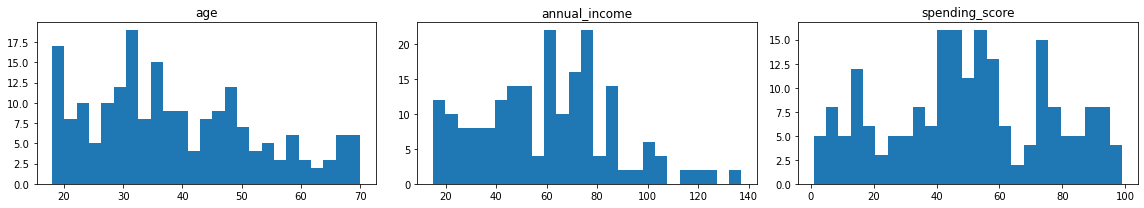

In [17]:
#continuous variable distributions
plt.figure(figsize=(16, 3))

for i, col in enumerate(cont_vars):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, 3, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=25)

    # Hide gridlines.
    plt.grid(False)
    
    #turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
    #get rid of overlapping plots
    plt.tight_layout()
    
plt.show()
    


<AxesSubplot:xlabel='gender', ylabel='count'>

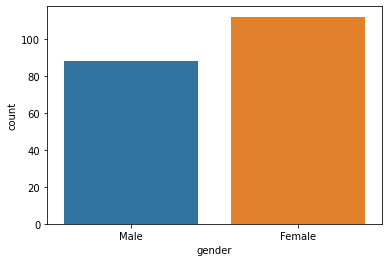

In [25]:
sns.countplot(x= 'gender', data=df)

## Split Data

In [7]:
## Split Data
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

train.shape, validate.shape, test.shape

((112, 5), (48, 5), (40, 5))

## Multivariate Exploration

**Using my predefined and imported functions...**

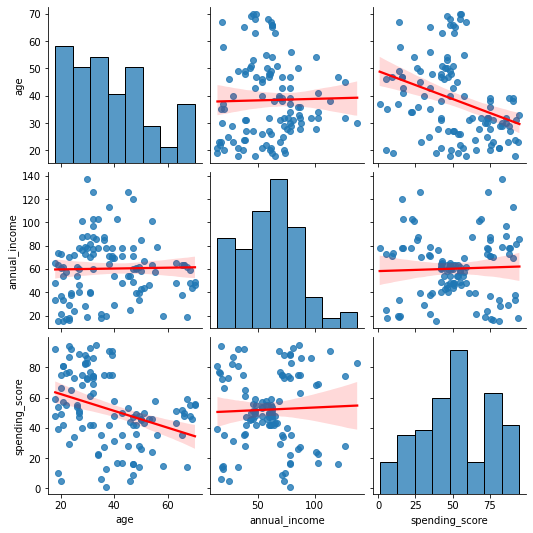

In [30]:
ex.plot_variable_pairs(train[cont_vars])

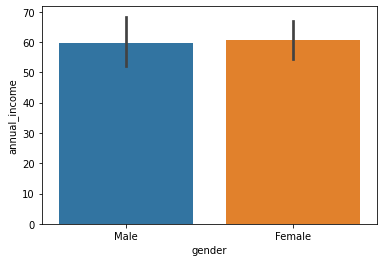

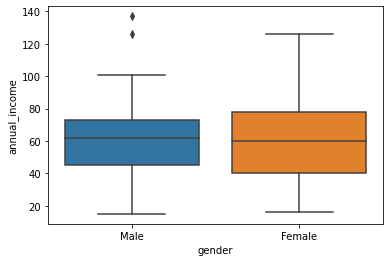

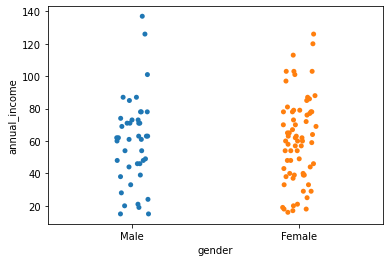

In [32]:
ex.plot_categorical_and_continuous_vars(train, 'gender', 'annual_income')

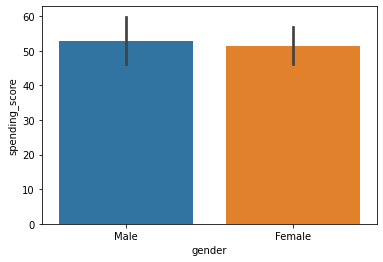

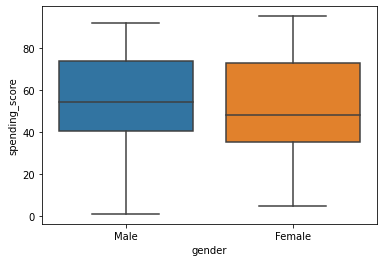

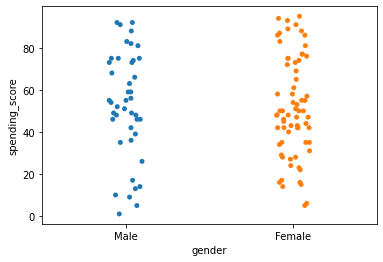

In [33]:
ex.plot_categorical_and_continuous_vars(train, 'gender', 'spending_score')

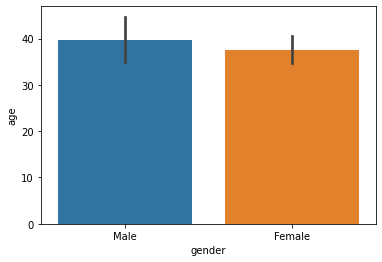

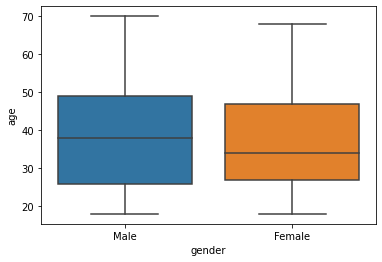

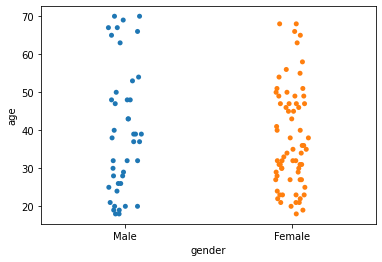

In [35]:
ex.plot_categorical_and_continuous_vars(train, 'gender', 'age')

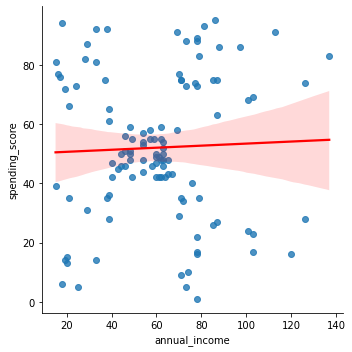

In [38]:
sns.lmplot(x='annual_income', y='spending_score', data=train, line_kws={'color': 'red'})
plt.show()

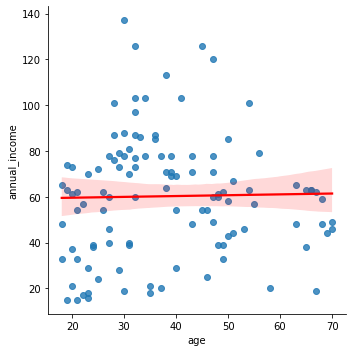

In [39]:
sns.lmplot(x='age', y='annual_income', data=train, line_kws={'color': 'red'})
plt.show()

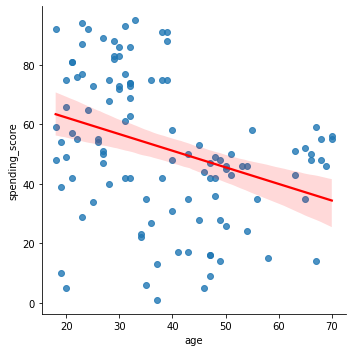

In [37]:
sns.lmplot(x='age', y='spending_score', data=train, line_kws={'color': 'red'})
plt.show()

<AxesSubplot:>

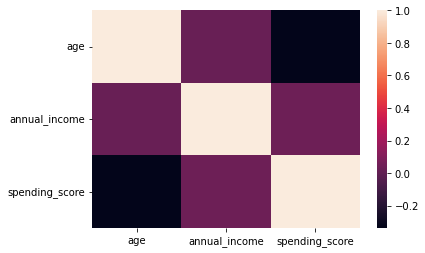

In [40]:
sns.heatmap((train[cont_vars]).corr())